In [1]:
import os
from pathlib import Path
from random import sample 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import rasterio
from rasterio.plot import show
from rasterio.features import geometry_mask

In [2]:
data_path = "/n/holyscratch01/tambe_lab/kayan/karena/"
mine_info_path = "/n/home07/kayan/data/mine_ids.txt"

In [3]:
# ids of all images
ids = [Path(x).stem for x in os.listdir(data_path+"images")]
# ids of just images containing mines
with open(mine_info_path, 'r') as f:
    mine_ids = f.read().split("\n") 

In [4]:
def load_img(img_id):
    img_path = data_path+"images/"+img_id+".tif"
    img = rasterio.open(img_path)
    img = img.read([3,2,1]) #RGB channels
    
    # normalize per channel
    img_norm = (img.T - np.min(img,axis=(1,2))) / (np.max(img,axis=(1,2)) - np.min(img,axis=(1,2))) # we take the transpose to allow for broadcasting
    img_norm = img_norm.T # undo transpose
    return img_norm

def load_raster(raster_id):
    raster_path = data_path+"rasters/"+raster_id+".tif"
    raster = rasterio.open(raster_path)
    raster = raster.read([1])
    return raster

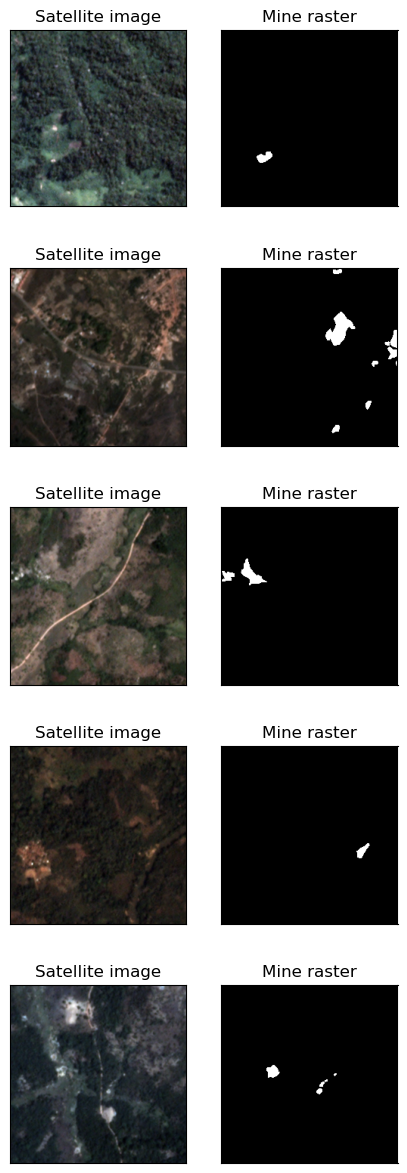

In [19]:
n = 5
ids = sample(mine_ids,n) # random subset of n images with mines
fig,axs = plt.subplots(nrows=n,ncols=2,figsize=(5,15))
for i in range(n):
    ax = axs[i]
    img = load_img(ids[i])
    raster = load_raster(ids[i])
    ax[0].imshow(np.moveaxis(img,0,-1))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("Satellite image")
    ax[1].imshow(np.moveaxis(raster,0,-1),cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Mine raster")